# Ridge Regression
A regression + [regularization](regularization.ipynb) technique. Similar to [lasso regression](lasso_regression.ipynb), it works by penalizing the magnitude of coefficients of features, along with minimizing the error between the predicted and actual observations. It's mainly used on datasets with <em>few</em> parameters to prevent overfitting.

It performs `L2 legulariztion` — adds a penalty equivalent to the square of the magnitude of the coefficients. 

Assuming the observations are centered, ridge estimates are computed by:<br>

$$min_{\beta_i} \sum_{i=1}^n\left(y_i - \sum_{j=1}^k \beta_{j} x_{ij}\right)^2 + \lambda \sum_{j=1}^p \beta_j^2$$

which can be written in matrix form:<br><br>
$$argmin_\beta \|y - X\beta\|_2^2 + \lambda \|\beta\|_2^2$$

Since the objective function, and the penalty function have an `L2 norm`, the optimization model is convex. We can show that there is closed form solution by taking the derivative and setting it to `0`. 

$$\hat{\beta}^{ridge} = \left(X^TX + \lambda I_p\right)^{-1} X^Ty$$

where $\lambda$ is the tuning parameter that controls the amount of shrinkage of the coefficients.

#### Why penalize the magnitude of coefficients? 
Let's follow a generated example

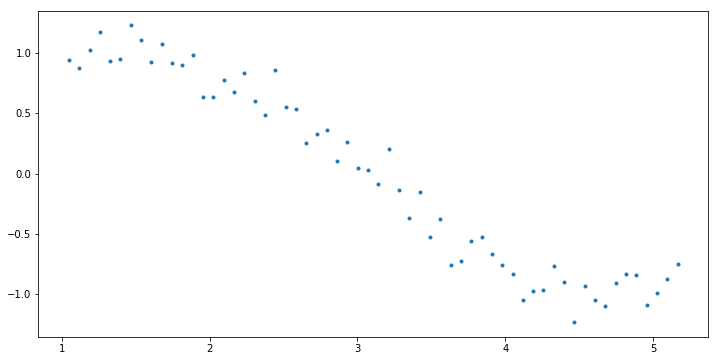

In [7]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6

# define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(42)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0, 0.15, len(x))
_data = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])
data = _data.copy() # keep the original dataset
plt.plot(data['x'], data['y'],'.');

We can estimate the function above using `polynomial regression`

In [8]:
for i in range(2,16): 
    colname = f'x_{i}' 
    data[colname] = _data['x']**i
    
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,0.940533,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,0.878054,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,1.024337,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,1.179511,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,0.935173,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


In [46]:
from sklearn.linear_model import LinearRegression

def linear_regression(data, power, models_to_plot):
    predictors = ['x']
    
    if power >= 2:
        predictors.extend([f'x_{i}' for i in range(2, power+1)])
    
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])
    
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

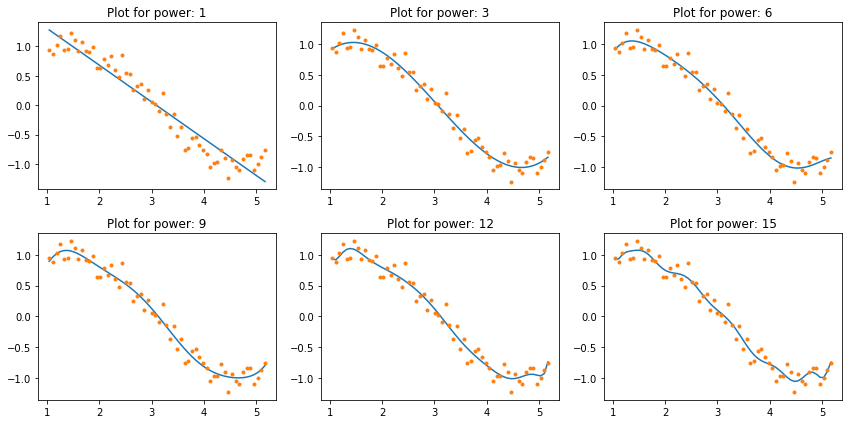

In [49]:
col = ['rss','intercept'] + [f'coef_x_{i}' for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

# define the powers for which a plot is required:
models_to_plot = {1:231, 3:232, 6:233, 9:234, 12:235, 15:236}

# iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1, :i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

As the model complexity increases, we see more `overfitting`.

Great, but why does changing the magnitude of the coefficients matter? Check out below how the size of the coefficients increase with model complexity. When the coefficient increases, we are saying that the corresponding feature deserves more weight, and 

In [48]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,2.8,1.9,-0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,2.7,2.1,-0.74,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,0.99,-0.59,2.5,-1.1,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,0.96,0.2,1.2,-0.4,-0.044,0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,0.96,0.23,1.1,-0.34,-0.066,0.017,-0.00024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.93,-6.2,17,-16,7.9,-2.1,0.28,-0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.91,-18,52,-58,34,-12,2.3,-0.24,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.91,-5.9,11,-0.26,-10,9,-3.6,0.77,-0.086,0.0039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.91,7.7,-41,85,-88,53,-20,4.5,-0.63,0.049,-0.0016,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.89,2.5e+02,-1.1e+03,2e+03,-2.1e+03,1.4e+03,-6.1e+02,1.8e+02,-36,4.5,-0.33,0.01,NaN,NaN,NaN,NaN,NaN


So now that we have an idea of how managing the magnitude of coefficients matters, let's take a look at ridge regression. 

It optimizes the following function:<br>

$f(x) = RSS + \alpha $(sum of squares of coefficients) for $0 \lt \alpha \leq \infty$

Here's an example of how it works in practice.

In [56]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/Users/Ipanema/src/gstvolvr/notebooks/venv/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.81609e-17): result may not be accurate.
  overwrite_a=True).T


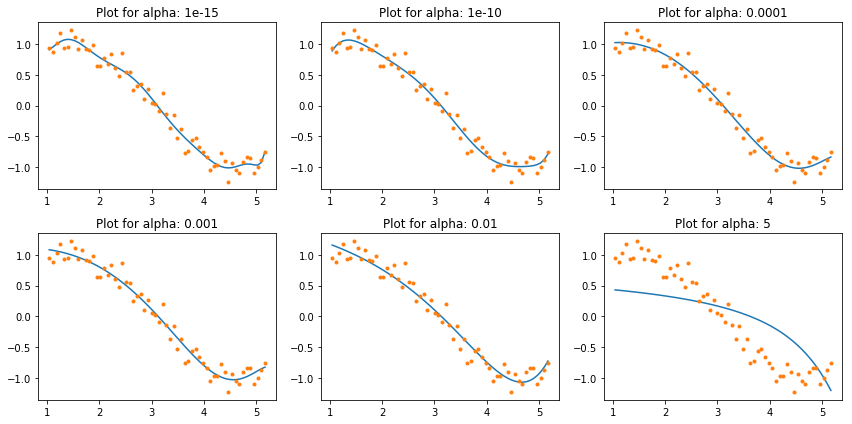

In [58]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + [f'coef_x_{i}' for i in range(1,16)]
ind = [f'alpha_{alpha_ridge[i]}' for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

As $\alpha$ increases, the model complexity decreases. We have to be carefull not to cause underfitting with a large $\alpha$.

In [60]:
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.88,52,-2e+02,3.2e+02,-2.8e+02,1.3e+02,-37,4.1,0.47,-0.22,0.023,0.003,-0.00093,-0.00019,0.00011,-1.6e-05,8e-07
alpha_1e-10,0.91,-8.8,23,-20,7.3,-0.8,-0.18,0.023,0.0075,-1.9e-05,-0.00027,-3.6e-05,5.2e-06,2.2e-06,3.8e-08,-1.1e-07,1e-08
alpha_1e-08,0.92,-3,8,-5.2,1.1,0.039,-0.029,-0.0042,0.00017,0.00015,2.7e-05,1.6e-06,-4.3e-07,-1.6e-07,-2.6e-08,-1.1e-09,1.2e-09
alpha_0.0001,0.96,0.76,0.44,-0.15,-0.024,-0.0016,0.00016,8.3e-05,1.9e-05,3.1e-06,3.8e-07,2.2e-08,-5e-09,-2.2e-09,-4.7e-10,-5.6e-11,6.2e-12
alpha_0.001,1,1.1,0.11,-0.084,-0.016,-0.0019,-8.7e-05,2.7e-05,1.1e-05,2.5e-06,4.7e-07,7.4e-08,9.1e-09,5.6e-10,-1.4e-10,-7.6e-11,-2.4e-11
alpha_0.01,1.2,1.4,-0.19,-0.049,-0.0083,-0.0011,-8.7e-05,3.1e-06,3.4e-06,1e-06,2.2e-07,4.1e-08,6.5e-09,8.3e-10,5.3e-11,-1.4e-11,-7.9e-12
alpha_1,5.5,0.94,-0.15,-0.02,-0.003,-0.00046,-6.9e-05,-9.7e-06,-1.2e-06,-1.3e-07,-7.6e-09,1.7e-09,8.6e-10,2.6e-10,6.6e-11,1.5e-11,3.5e-12
alpha_5,14,0.5,-0.06,-0.0086,-0.0014,-0.00024,-4.1e-05,-6.8e-06,-1.1e-06,-1.9e-07,-3e-08,-4.9e-09,-7.7e-10,-1.2e-10,-1.8e-11,-2.5e-12,-3.2e-13
alpha_10,18,0.35,-0.038,-0.0056,-0.00095,-0.00017,-2.9e-05,-5.2e-06,-9.1e-07,-1.6e-07,-2.8e-08,-5e-09,-8.8e-10,-1.5e-10,-2.7e-11,-4.8e-12,-8.4e-13
alpha_20,23,0.23,-0.023,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.5e-07,-1.2e-07,-2.2e-08,-4e-09,-7.3e-10,-1.3e-10,-2.5e-11,-4.5e-12,-8.4e-13


A few things to keep in mind here:
* `RSS` increases with $\alpha$
* the magnitude of the coefficients is inversely proportional to $\alpha$ 
* high $\alpha$ leads to underfitting
* coefficients can be very small, but are never `0`

#### Resources:
* [A Complete Tutorial on Ridge and Lasso Regression in Python](https://chandlerfang.blog/2016/09/30/a-complete-tutorial-on-ridge-and-lasso-regression-in-python/)